In [8]:
!conda env list
!touch image_processing.ipynb
!pwd

# conda environments:
#
kaggle2017            *  /Users/szalmaf/anaconda/envs/kaggle2017
kaggle2017-2.7           /Users/szalmaf/anaconda/envs/kaggle2017-2.7
py36                     /Users/szalmaf/anaconda/envs/py36
root                     /Users/szalmaf/anaconda

/Users/szalmaf/Documents/GitHub/Training Statistics/fastai_Deep-Learning/mySolution


In [1]:
%matplotlib inline
import utils; reload(utils)
from utils import *

Using Theano backend.


## Simple linear regression in terms of a neural network: x -> y

In [2]:
# indep variable
x = np.array(range(30))/30.

In [3]:
# noise 
d = (random(30) - 0.5)/2.
# response + noise
y = 1. + 2. * x + d 

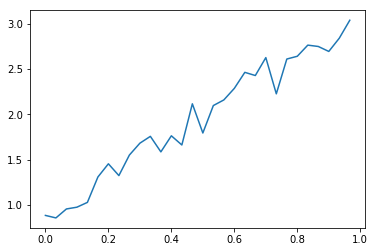

In [4]:
plt.plot(x,y)

In [5]:
# build model: one (dense) layer nn, 1 output node, 1 input node
lm = Sequential([Dense(1, input_shape=(1,))])
# Use stochastic gradient descent (SGD) and Mean Squared Error (MSE) as loss function
lm.compile(optimizer=SGD(lr=0.1), loss='mse') 
lm.model.summary() # 2 fitting parameters a (alpha, intersection), b (beta)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_input_1 (InputLayer)       (None, 1)             0                                            
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1)             2           dense_input_1[0][0]              
Total params: 2
Trainable params: 2
Non-trainable params: 0
____________________________________________________________________________________________________


In [36]:
lm.evaluate(x, y, verbose=0)

0.017564596608281136

In [37]:
lm.fit(x, y, nb_epoch=80, batch_size=30)

Epoch 1/80
30/30 [==============================] - 0s - loss: 0.0176
Epoch 2/80
30/30 [==============================] - 0s - loss: 0.0176
Epoch 3/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 4/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 5/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 6/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 7/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 8/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 9/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 10/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 11/80
30/30 [==============================] - 0s - loss: 0.0174
Epoch 12/80
30/30 [==============================] - 0s - loss: 0.0174
Epoch 13/80
30/30 [==============================] - 0s - loss: 0.0174
Epoch 14/80
30/30 [==============================] - 0s - loss: 0.0174
Epoch 15/80
30/

In [38]:
a = lm.get_weights()[1][0]; b = lm.get_weights()[0][0][0]

In [39]:
def lin(a,b,x): return a + b * x

In [40]:
fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot(x, lin(a, b, x))
plt.close()

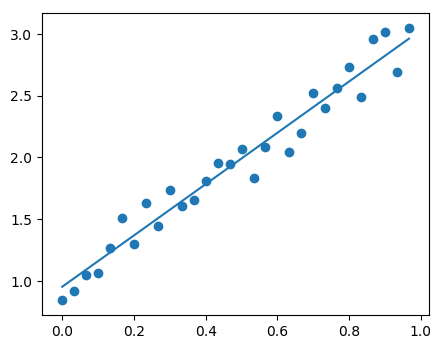

In [41]:
fig

In [43]:
a

0.95207882

## Multiple linear regression: (x1, x2) -> y

In [45]:
# 30 by 2 matrix containing x1 and x2 in its two columns
x = np.transpose(np.array((range(30), permutation(range(30))))/30.)

In [98]:
# Add a small perturbation over perfect linear relationship bwn indep vars (x1,x2) and the response (y)
d = (random(30) - 0.5)/2.
# Response variable
y = np.matmul(x, [2., 3.]) + 1. + d

In [99]:
x[:5]

array([[ 0.    ,  0.9333],
       [ 0.0333,  0.    ],
       [ 0.0667,  0.9   ],
       [ 0.1   ,  0.3   ],
       [ 0.1333,  0.5667]])

In [100]:
# Set up 1-layer neural network, 1 output and 2 input neurons
lm2 = Sequential([Dense(1, input_shape=(2,))])
# Use stochastic gradient descent (SGD),  and mean squared error (MSE) loss; MSE is *terrible* loss fn for optimization
lm2.compile(optimizer=SGD(lr=0.1), loss='mse')

In [105]:
lm2.evaluate(x, y, verbose=0)

0.041306339204311371

In [118]:
%time lm2.fit(x, y, nb_epoch=80, batch_size=900)

Epoch 1/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 2/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 3/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 4/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 5/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 6/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 7/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 8/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 9/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 10/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 11/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 12/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 13/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 14/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 15/80
30/

In [119]:
lm2.evaluate(x, y, verbose=0)

0.016848349943757057

In [120]:
lm2.get_weights() # MSE cannot get the fitting parameters right

[array([[ 2.097 ],
        [ 2.9163]], dtype=float32), array([ 1.0033], dtype=float32)]

In [122]:
lm2.model.summary() # 3 parameters a, b1, b2

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_input_5 (InputLayer)       (None, 2)             0                                            
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 1)             3           dense_input_5[0][0]              
Total params: 3
Trainable params: 3
Non-trainable params: 0
____________________________________________________________________________________________________


# Kaggle 2017 Data Science Bowl

In [2]:
vgg = Vgg16().model

/Users/szalmaf/anaconda/envs/kaggle2017-2.7/lib/python2.7/site-packages/keras/layers/core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [3]:
vgg.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [4]:
data_root = '/Users/szalmaf/Documents/GitHub/Training Python/Kaggle_Data_Science_Bowl_2017/'

In [5]:
all_labels = pd.read_csv(data_root + 'labeled_patients_labels.csv')

In [46]:
all_labels.head

<bound method DataFrame.head of       Unnamed: 0                                id  cancer
0              0  0015ceb851d7251b8f399e39779d1e7d     1.0
1              1  0030a160d58723ff36d73f41b170ec21     0.0
2              2  003f41c78e6acfa92430a057ac0b306e     0.0
3              3  006b96310a37b36cccb2ab48d10b49a3     1.0
4              4  008464bb8521d09a42985dd8add3d0d2     1.0
5              5  0092c13f9e00a3717fdc940641f00015     0.0
6              6  00986bebc45e12038ef0ce3e9962b51a     0.0
7              7  00cba091fa4ad62cc3200a657aeb957e     0.0
8              8  00edff4f51a893d80dae2d42a7f45ad1     1.0
9              9  0121c2845f2b7df060945b072b2515d7     0.0
10            10  013395589c01aa01f8df81d80fb0e2b8     0.0
11            11  01de8323fa065a8963533c4a86f2f6c1     0.0
12            12  01e349d34c06410e1da273add27be25c     0.0
13            13  01f1140c8e951e2a921b61c9a7e782c2     0.0
14            14  024efb7a1e67dc820eb61cbdaa090166     0.0
15            15  0257df

In [47]:
trn_labels = onehot(np.array(np.int32(all_labels['cancer'][0:80])))

In [49]:
val_labels = onehot(np.array(np.int32(all_labels['cancer'][80:100])))

In [50]:
val_labels.shape

(20, 2)

In [9]:
resArr100 = load_array('/Users/szalmaf/Documents/GitHub/Training Python/Kaggle_Data_Science_Bowl_2017/labeled_patient_collapsed_images-100x3x224x224.bc')

In [10]:
resArr100.shape

(100, 3, 224, 224)

In [11]:
trn = resArr100[0:80]

In [12]:
val = resArr100[80:100]

In [13]:
val.shape

(20, 3, 224, 224)

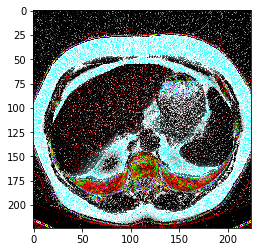

In [14]:
plot(val[0])

In [15]:
vgg.pop();vgg.pop();vgg.pop();vgg.pop();vgg.pop();vgg.pop();vgg.pop();

In [16]:
vgg.compile(Adam(), 'categorical_crossentropy', metrics=['accuracy'])

In [17]:
conv_val_feat = vgg.predict(val, batch_size=2, verbose=1)
conv_trn_feat = vgg.predict(trn, batch_size=2, verbose=1)

80/80 [==============================] - 41s     

In [18]:
conv_trn_feat.shape

(80, 512, 14, 14)

In [19]:
vgg.input_shape, vgg.output_shape

((None, 3, 224, 224), (None, 512, 14, 14))

In [20]:
conv_layers,_ = split_at(vgg, Convolution2D)

In [21]:
conv_layers[-1].output_shape[1:]

(512, 14, 14)

In [22]:
nf=128; p=0

In [23]:
def get_lrg_layers():
    return [
        BatchNormalization(axis=1, input_shape=conv_layers[-1].output_shape[1:]),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
#         Convolution2D(nf,3,3, activation='relu', border_mode='same'),
#         BatchNormalization(axis=1),
#         MaxPooling2D((2,2)),
        Convolution2D(2,3,3, border_mode='same'),
        Dropout(p),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ]

In [24]:
lrg_model = Sequential(get_lrg_layers())

In [25]:
lrg_model.input_shape, lrg_model.output_shape

((None, 512, 14, 14), (None, 2))

In [26]:
lrg_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_1 (BatchNorma (None, 512, 14, 14)   2048        batchnormalization_input_1[0][0] 
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 128, 14, 14)   589952      batchnormalization_1[0][0]       
____________________________________________________________________________________________________
batchnormalization_2 (BatchNorma (None, 128, 14, 14)   512         convolution2d_14[0][0]           
____________________________________________________________________________________________________
maxpooling2d_6 (MaxPooling2D)    (None, 128, 7, 7)     0           batchnormalization_2[0][0]       
___________________________________________________________________________________________

In [53]:
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ValueError: Invalid metric: log_loss

In [51]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=2, nb_epoch=1, 
              validation_data=(conv_val_feat, val_labels))

Train on 80 samples, validate on 20 samples
Epoch 1/1
80/80 [==============================] - 2s - loss: 0.9547 - acc: 0.6500 - val_loss: 4.0402 - val_acc: 0.1500

In [91]:
unresArr198 = load_array('/Users/szalmaf/Documents/GitHub/Training Python/Kaggle_Data_Science_Bowl_2017/unlabeled_patient_collapsed_images-198x3x224x224.bc')

In [92]:
unresArr198.shape

(198, 3, 224, 224)

In [93]:
unlabeledPredictionvgg = vgg.predict(unresArr198, batch_size=2, verbose=1)

198/198 [==============================] - 107s     

In [95]:
unlabeledPrediction = lrg_model.predict(unlabeledPredictionvgg, batch_size=2, verbose=1)

198/198 [==============================] - 1s     

In [151]:
unlabeledPrediction_df = pd.DataFrame(unlabeledPrediction[:,1], columns=['cancer'])

In [152]:
unlabeledPrediction_df

,cancer
0,1.000000
1,0.444556
2,0.924116
3,0.317368
4,0.941985
5,0.991276
6,0.994802
7,0.997038
8,0.928200
9,0.166370


In [162]:
unlabeledIds = pd.read_csv(data_root + 'unlabeledPatients.csv', index_col=0)

In [164]:
submission_df = pd.concat([unlabeledIds, unlabeledPrediction_df], axis=1)

In [165]:
submission_df

,id,cancer
0,026470d51482c93efc18b9803159c960,1.000000
1,031b7ec4fe96a3b035a8196264a8c8c3,0.444556
2,03bd22ed5858039af223c04993e9eb22,0.924116
3,06a90409e4fcea3e634748b967993531,0.317368
4,07b1defcfae5873ee1f03c90255eb170,0.941985
5,0b20184e0cd497028bdd155d9fb42dc9,0.991276
6,12db1ea8336eafaf7f9e3eda2b4e4fef,0.994802
7,159bc8821a2dc39a1e770cb3559e098d,0.997038
8,174c5f7c33ca31443208ef873b9477e5,0.928200
9,1753250dab5fc81bab8280df13309733,0.166370


In [166]:
submission_df.to_csv(data_root + 'first_submission.csv', in)